# Case Study: Sentiment Analysis

### Step 1 : Data Preparation and exploration

In [57]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')



In [58]:
# Sample the data to speed up computation
df = df.sample(frac=0.1, random_state=10)

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [59]:
df.shape

(41384, 6)

Show few rows in which we have Nan value

In [60]:
df[df.isnull().any(axis=1)].head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
374058,Samsung Galaxy S7 Edge SM-G935F 32GB Factory U...,NaN,593.50,4,except samsung pay everything is good,0.0
15676,Apple iPhone 4S 32GB White - Unlocked,NaN,155.00,5,thanks... excellent...love my iphone 4s used.,0.0
393778,Sony Xperia Z1 C6903 16GB Unlocked GSM 4G LTE ...,NaN,219.99,1,the phone is none working good!!!,0.0
175801,CNPGD All-in-1 Watch Cell Phone & Smart Watch ...,NaN,49.99,4,i really like this very easy to set up,1.0


Drop missing values and save the dataframe

In [61]:
# Drop missing values
df.dropna(inplace=True)



In [62]:
# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 2.5]



In [64]:
# Encode rates higher than 2.5 as 1 (rated positively)
# Encode ratew lower than 2.5 as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 2.5, 1, 0)
df.head(10)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [66]:
# Most ratings are positives and higher than 75%
df['Positively Rated'].mean()

0.76739104406130265

### Let's do some visualisation on the brands's rates

Import modules

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import cm
% matplotlib inline

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


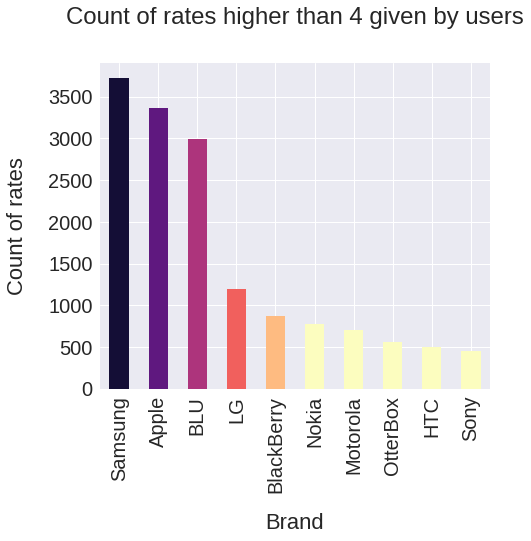

In [125]:
sns.set(font_scale=2)
color = cm.magma(np.linspace(0.1, 1.8, 10))
df[df['Rating'] >4]['Brand Name'].value_counts()[:10].plot(kind='bar', figsize=(7, 6), rot=0,colors=color)
plt.xlabel("Brand", labelpad=20)
plt.xticks(rotation=90)
plt.ylabel("Count of rates", labelpad=20)
plt.title("Count of rates higher than 4 given by users", y=1.1);

We can see Apple and Samsung are tight in front of the ranking

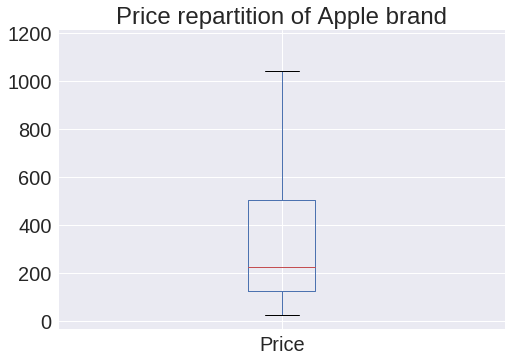

In [142]:
df[df['Brand Name'] =='Apple']['Price'].plot(kind='box',title='Price repartition of Apple brand')


In [154]:
pd.DataFrame(df[df['Brand Name'] =='Apple']['Price'].describe()[1:])

,Price
mean,306.990628
std,238.391676
min,24.600000
25%,125.000000
50%,224.770000
75%,505.990000
max,1157.000000


We have a mean price for Apple product = 306 USDT and a median = 224 USDT

## Spliting dataset in order to train and test

In [155]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [158]:
print('X_train first entry:\n\n', X_train.iloc[1])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 The phone is good. You can't set up your account entirely on line. It involves a couple of calls to customer service. The buttons and screen are easy to see. I bought it for better call sound, but it isn't any better than my other cheap phone. Plans are cheap but voice mail is extra and you can't send even one text message without adding a texting package.


X_train shape:  (25056,)


# Using Count Vectorizer to do text extraction in reviews

In [159]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [162]:
vect.get_feature_names()[::2700]

['00',
 'bell',
 'definitelly',
 'funcionado',
 'leo',
 'perfectly',
 'screan',
 'traje']

In [163]:
len(vect.get_feature_names())

20827

In [164]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<25056x20827 sparse matrix of type '<class 'numpy.int64'>'
	with 685872 stored elements in Compressed Sparse Row format>

In [165]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.852294144793


In [167]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'junk' 'horrible' 'waste' 'broken' 'defective' 'useless' 'sucks'
 'died' 'sucked']

Largest Coefs: 
['excelente' 'excelent' 'excellent' 'perfect' 'love' 'amazing' 'perfectly'
 'loves' 'awesome' 'great']


# Tfidf

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

5788

In [169]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.847870060309


In [170]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['fps' 'printer' 'circumference' 'realistic' 'consequences' 'discounted'
 'experiment' 'arena' 'reference' 'objective']

Largest tfidf: 
['top' 'memory' 'super' 'celular' 'described' 'windows' 'best' 'everything'
 'awesome' 'awsome']


In [171]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'waste' 'worst' 'disappointed' 'slow' 'horrible' 'never' 'doesn'
 'terrible' 'junk']

Largest Coefs: 
['great' 'love' 'excellent' 'perfect' 'good' 'best' 'awesome' 'amazing'
 'nice' 'price']


In [172]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# n-grams

In [173]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

31904

In [174]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.872475916626


In [175]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['junk' 'no good' 'not good' 'horrible' 'defective' 'worst' 'sucks'
 'broken' 'garbage' 'very disappointed']

Largest Coefs: 
['excelente' 'not bad' 'excellent' 'excelent' 'perfect' 'great' 'awesome'
 'love' 'amazing' 'good']


In [176]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 1]
